# multi linear regression assignment

## Q.1. Toyota Corolla.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [4]:
df_1 = pd.read_csv("ToyotaCorolla.csv",usecols = ['Price','Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'])
df_1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [6]:
df_1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [7]:
df_1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
df_1.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


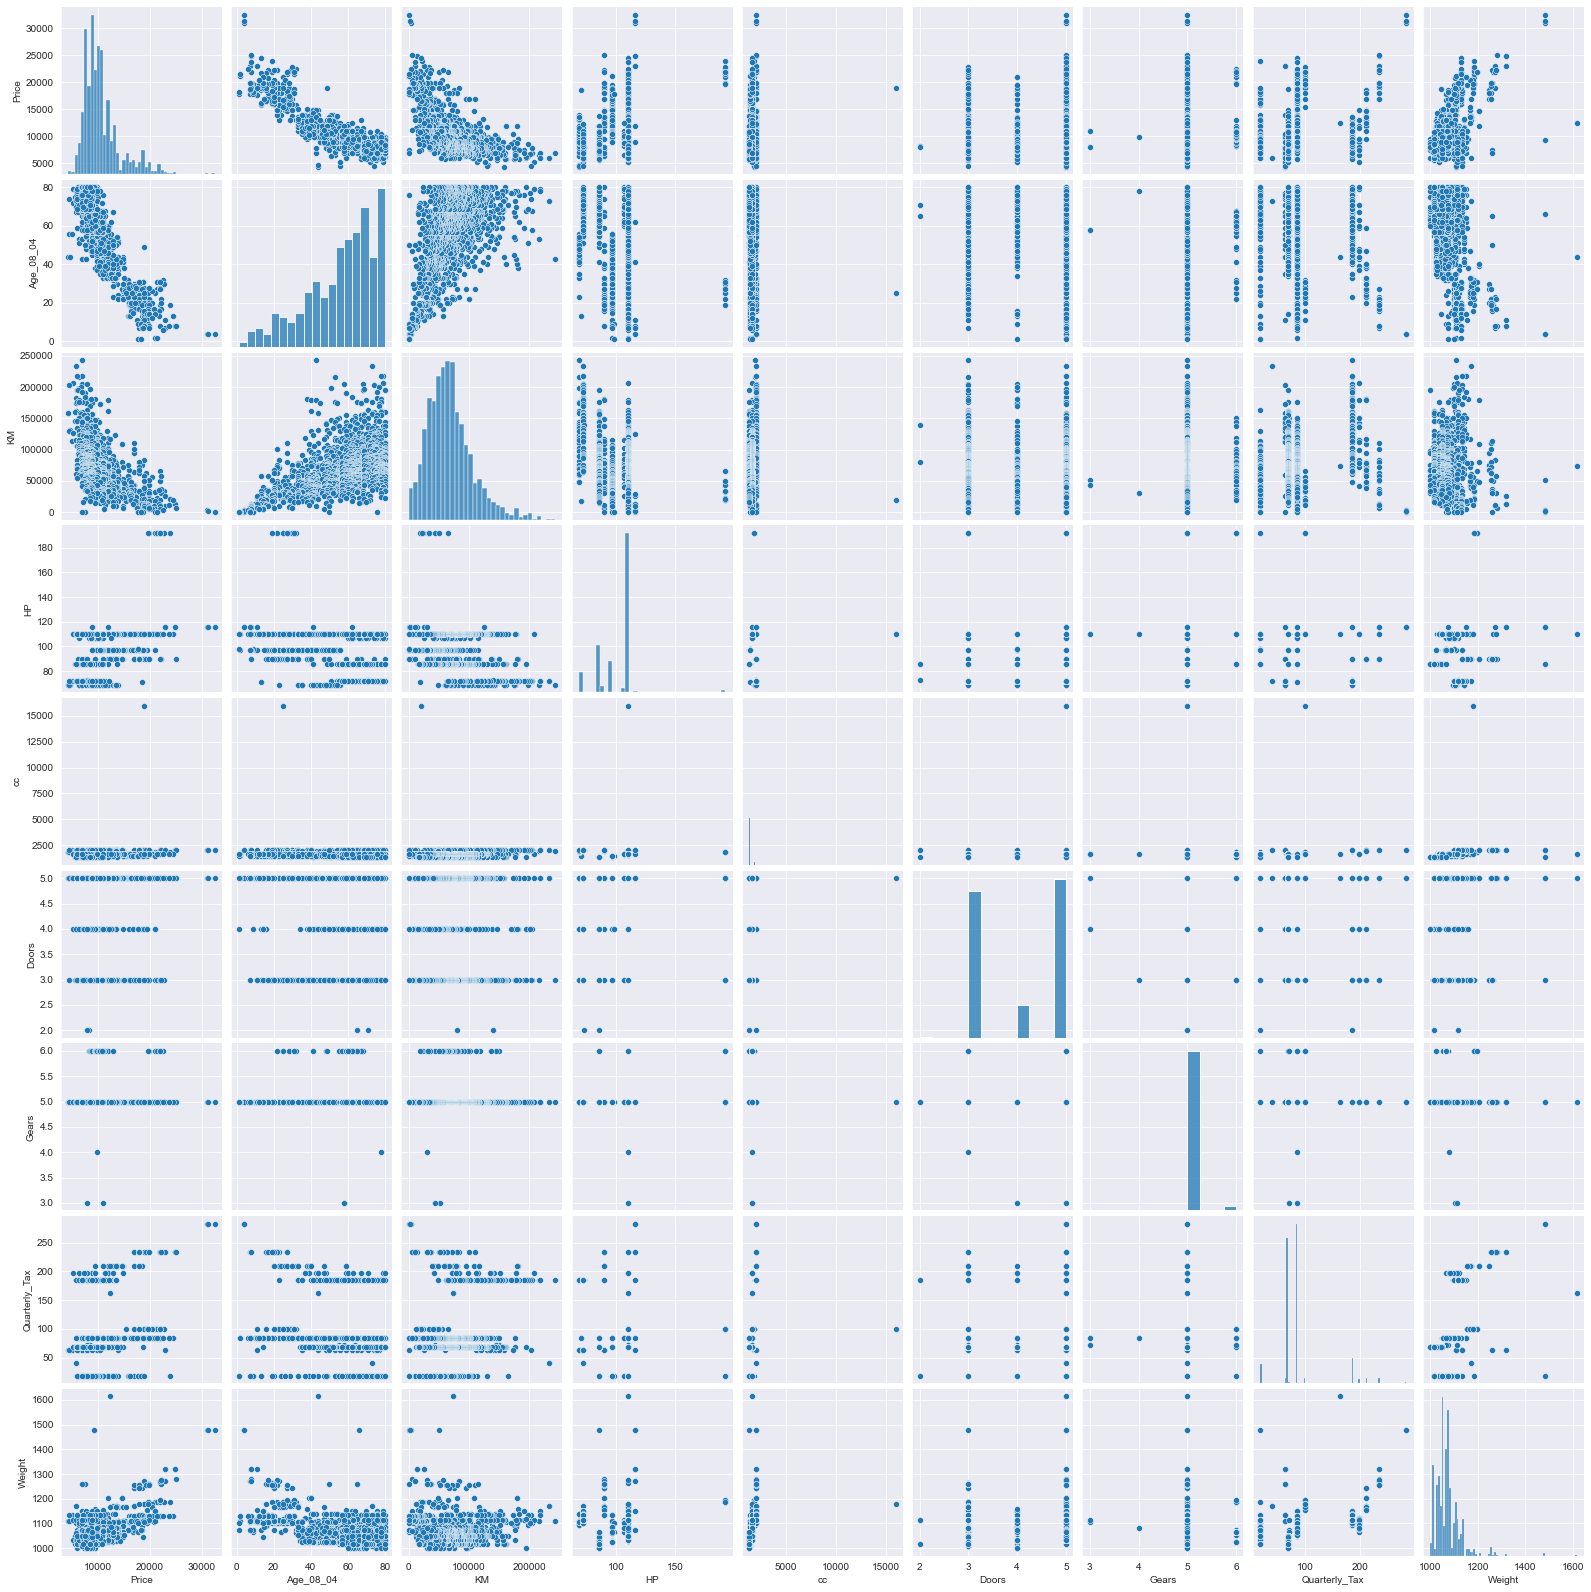

In [10]:
sns.set_style(style='darkgrid')
sns.pairplot(df_1);

In [11]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df_1).fit()
model.params

Intercept       -5573.106358
Age_08_04        -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [12]:
print(model.tvalues, '\n', model.pvalues)

Intercept        -3.948666
Age_08_04       -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 
 Intercept         8.241949e-05
Age_08_04        3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [13]:
(model.rsquared,model.rsquared_adj)

(0.8637627463428192, 0.8629989775766963)

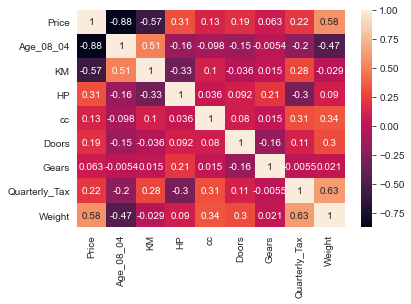

In [14]:
sns.heatmap(df_1.corr(), annot=True);

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:49:02   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model_age = smf.ols('Price~Age_08_04',data = df_1).fit()

In [17]:
model_age.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4758.
Date:                Fri, 10 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:50:37   Log-Likelihood:                -12756.
No. Observations:                1436   AIC:                         2.552e+04
Df Residuals:                    1434   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.029e+04    146.097    138.908      0.000       2e+04    2.06e+04
Age_08_04   -170.9336      2.478    -68.978      0.000    -175.795    -166.073
==============================================================================
Omnibus:                      359.275   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2774.226
Skew:                           0.946   Prob(JB):                         0.00
Kurtosis:                       9.541   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model_km = smf.ols('Price~KM',data = df_1).fit()

In [19]:
model_km.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     690.0
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.76e-124
Time:                        14:51:05   Log-Likelihood:                -13525.
No. Observations:                1436   AIC:                         2.705e+04
Df Residuals:                    1434   BIC:                         2.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.451e+04    163.915     88.510      0.000    1.42e+04    1.48e+04
KM            -0.0551      0.002    -26.268      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.716   Durbin-Watson:                   0.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1115.783
Skew:                           1.388   Prob(JB):                    5.14e-243
Kurtosis:                       6.308   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model_hp = smf.ols('Price~HP',data = df_1).fit()

In [21]:
model_hp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     158.0
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.93e-34
Time:                        14:51:30   Log-Likelihood:                -13732.
No. Observations:                1436   AIC:                         2.747e+04
Df Residuals:                    1434   BIC:                         2.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2990.2764    622.568      4.803      0.000    1769.035    4211.518
HP            76.2600      6.068     12.568      0.000      64.357      88.163
==============================================================================
Omnibus:                      448.876   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.172
Skew:                           1.591   Prob(JB):                    6.43e-289
Kurtosis:                       6.472   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model_cc = smf.ols('Price~cc',data = df_1).fit()

In [23]:
model_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.55e-06
Time:                        14:52:02   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
model_door = smf.ols('Price~Doors',data = df_1).fit()

In [25]:
model_door.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.46e-12
Time:                        14:52:41   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model_gears = smf.ols('Price~Gears',data = df_1).fit()

In [27]:
model_gears.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     5.733
Date:                Fri, 10 Sep 2021   Prob (F-statistic):             0.0168
Time:                        14:53:16   Log-Likelihood:                -13804.
No. Observations:                1436   AIC:                         2.761e+04
Df Residuals:                    1434   BIC:                         2.762e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4628.0652   2550.553      1.815      0.070    -375.149    9631.280
Gears       1214.1261    507.069      2.394      0.017     219.450    2208.802
==============================================================================
Omnibus:                      483.564   Durbin-Watson:                   0.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1509.458
Skew:                           1.698   Prob(JB):                         0.00
Kurtosis:                       6.700   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model_Tax = smf.ols('Price~Quarterly_Tax',data = df_1).fit()

In [29]:
model_Tax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     72.38
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           4.41e-17
Time:                        14:53:36   Log-Likelihood:                -13771.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1434   BIC:                         2.756e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9046.7382    218.889     41.330      0.000    8617.362    9476.115
Quarterly_Tax    19.3301      2.272      8.507      0.000      14.873      23.787
==============================================================================
Omnibus:                      369.212   Durbin-Watson:                   0.276
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.513
Skew:                           1.417   Prob(JB):                    6.82e-184
Kurtosis:                       5.462   Cond. No.                         226.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
model_weight = smf.ols('Price~Weight',data = df_1).fit()

In [31]:
model_weight.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.337
Method:                 Least Squares   F-statistic:                     731.5
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.63e-130
Time:                        14:53:59   Log-Likelihood:                -13511.
No. Observations:                1436   AIC:                         2.703e+04
Df Residuals:                    1434   BIC:                         2.704e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.222e+04   1589.807    -20.264      0.000   -3.53e+04   -2.91e+04
Weight        40.0444      1.481     27.046      0.000      37.140      42.949
==============================================================================
Omnibus:                      105.784   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.408
Skew:                           0.028   Prob(JB):                    4.04e-116
Kurtosis:                       5.980   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',
                  data=df_1).fit().rsquared
vif_age = 1 / (1 - rsq_age)

rsq_km = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',
                 data=df_1).fit().rsquared
vif_km = 1 / (1 - rsq_km)

rsq_hp = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',
                 data=df_1).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)

rsq_cc = smf.ols('cc~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',
                 data=df_1).fit().rsquared
vif_cc = 1 / (1 - rsq_cc)

rsq_doors = smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',
                    data=df_1).fit().rsquared
vif_doors = 1 / (1 - rsq_doors)

rsq_gears = smf.ols('Gears~Age_08_04+KM+HP+cc+Doors+Quarterly_Tax+Weight',
                    data=df_1).fit().rsquared
vif_gears = 1 / (1 - rsq_gears)

rsq_tax = smf.ols('Quarterly_Tax~Age_08_04+KM+HP+cc+Doors+Gears+Weight',
                  data=df_1).fit().rsquared
vif_tax = 1 / (1 - rsq_tax)

rsq_weight = smf.ols('Weight~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax',
                     data=df_1).fit().rsquared
vif_weight = 1 / (1 - rsq_weight)

data = {
    'Features': [
        'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'Quarterly_Tax',
        'Weight'
    ],
    'VIF': [
        vif_age, vif_km, vif_hp, vif_cc, vif_doors, vif_gears, vif_tax,
        vif_weight
    ]
}
Vif_frame = pd.DataFrame(data)
Vif_frame

,Features,VIF
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [33]:
model_Tax_wt = smf.ols('Price~Quarterly_Tax+Weight',data=df_1).fit()

In [34]:
model_Tax_wt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     424.9
Date:                Fri, 10 Sep 2021   Prob (F-statistic):          1.32e-145
Time:                        14:55:28   Log-Likelihood:                -13472.
No. Observations:                1436   AIC:                         2.695e+04
Df Residuals:                    1433   BIC:                         2.697e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -4.14e+04   1862.900    -22.223      0.000   -4.51e+04   -3.77e+04
Quarterly_Tax   -20.9907      2.367     -8.867      0.000     -25.634     -16.347
Weight           50.3131      1.850     27.203      0.000      46.685      53.941
==============================================================================
Omnibus:                      288.653   Durbin-Watson:                   0.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3126.381
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.127   Cond. No.                     2.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
(model_Tax.rsquared,model_Tax.aic)

(0.04804728567406569, 27546.829349548436)

In [36]:
(model_weight.rsquared,model_weight.aic)

(0.33779063704356427, 27025.656700592026)

In [37]:
(model_weight.rsquared,model_weight.rsquared_adj)

(0.33779063704356427, 0.33732884529812746)

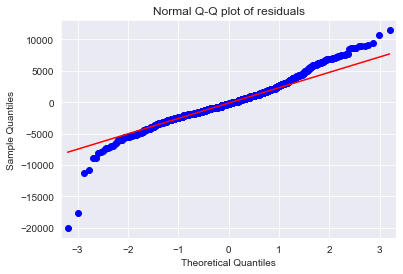

In [38]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_weight.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [39]:
list(np.where(model_weight.resid<-17000))

[array([221, 960], dtype=int64)]

In [40]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

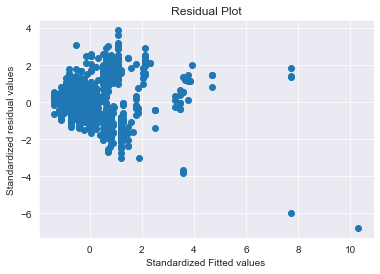

In [41]:
plt.scatter(get_standardized_values(model_weight.fittedvalues),get_standardized_values(model_weight.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

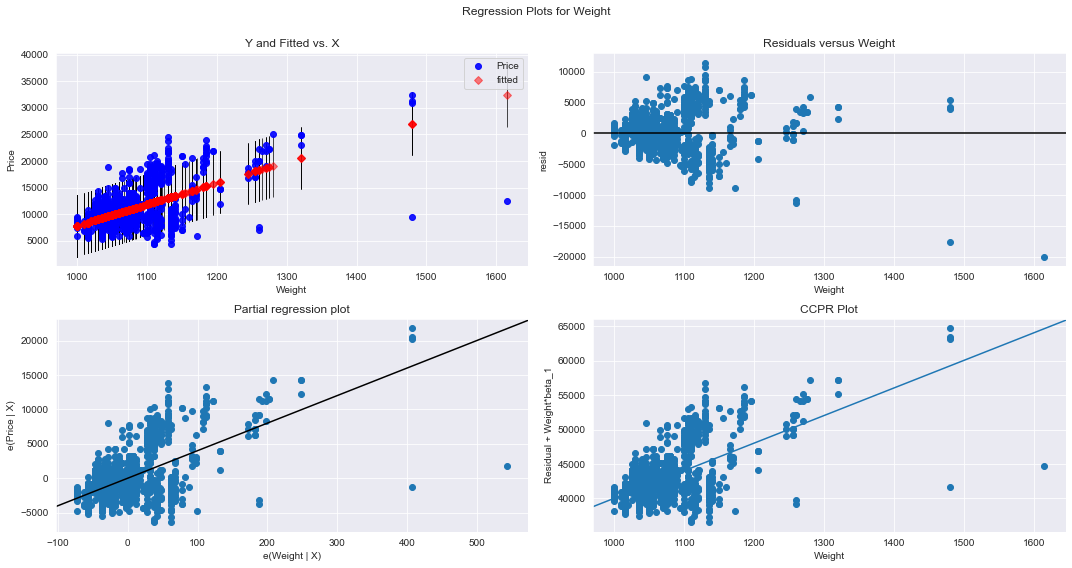

In [42]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_weight, "Weight", fig=fig)
plt.show()

In [43]:
model_influence = model_weight.get_influence()
(c, _) = model_influence.cooks_distance

In [44]:
(np.argmax(c),np.max(c))

(221, 2.003596074922714)

In [45]:
df_2=df_1.drop(df_1.index[[221]],axis=0).reset_index()

In [46]:
df_2.shape

(1435, 10)

In [47]:
df_2.head()

,index,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,0,13500,23,46986,90,2000,3,5,210,1165
1,1,13750,23,72937,90,2000,3,5,210,1165
2,2,13950,24,41711,90,2000,3,5,210,1165
3,3,14950,26,48000,90,2000,3,5,210,1165
4,4,13750,30,38500,90,2000,3,5,210,1170


In [48]:
final_model = smf.ols('Price~Weight',data=df_2).fit()

In [49]:
(final_model.rsquared,final_model.rsquared_adj)

(0.36060607620604346, 0.3601598836562919)

In [50]:
newdata=pd.DataFrame({'Weight':1165},index=[1])

In [51]:
final_model.predict(newdata)

1    14724.605762
dtype: float64

## Q.2 50_startups

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [53]:
df_1 = pd.read_csv('50_Startups.csv')
df_1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [54]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [55]:
df_1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [56]:
df_1.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [57]:
df_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


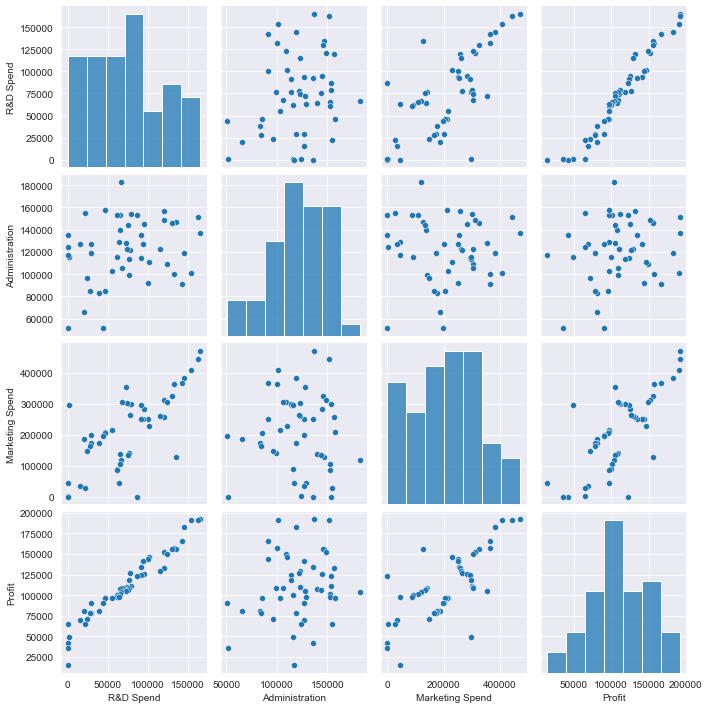

In [58]:
sns.set_style(style='darkgrid')
sns.pairplot(df_1);

In [59]:
df_1 = pd.get_dummies(df_1, columns=['State'])
df_1.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


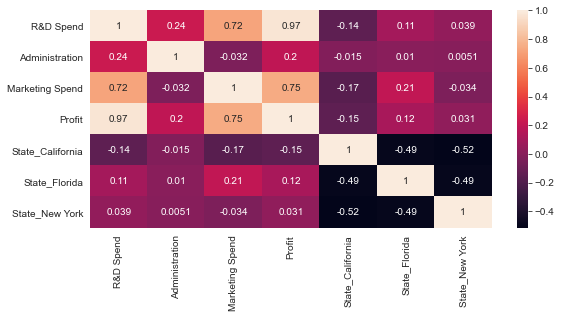

In [60]:
plt.figure(figsize=(9,4))
sns.heatmap(df_1.corr(),annot = True);

In [61]:
df_1.corr()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
R&D Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [62]:
df_1.rename(columns={'Marketing Spend':'Marketing'},inplace=True)
df_1.rename(columns={'R&D Spend':'RD'},inplace=True)
df_1.rename(columns={'State_New York':'NewYork'},inplace=True)

In [63]:
std = StandardScaler()
df_1_std = std.fit_transform(df_1)
df_1_std = pd.DataFrame(df_1_std, columns=df_1.columns)

In [64]:
df_1_std.head()

,RD,Administration,Marketing,Profit,State_California,State_Florida,NewYork
0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [65]:
model = smf.ols('Profit~RD+Administration+Marketing+State_California+State_Florida+NewYork',data = df_1_std).fit()

In [66]:
model.params

Intercept          -5.204170e-16
RD                  9.179307e-01
Administration     -1.877136e-02
Marketing           8.185781e-02
State_California   -6.031706e-04
State_Florida       1.730042e-03
NewYork            -1.100457e-03
dtype: float64

In [67]:
print(model.tvalues, '\n', model.pvalues)

Intercept          -1.555556e-14
RD                  1.736858e+01
Administration     -5.170116e-01
Marketing           1.573889e+00
State_California   -2.676515e-02
State_Florida       7.490466e-02
NewYork            -4.931619e-02
dtype: float64 
 Intercept           1.000000e+00
RD                  2.578772e-21
Administration      6.077373e-01
Marketing           1.226769e-01
State_California    9.787681e-01
State_Florida       9.406301e-01
NewYork             9.608905e-01
dtype: float64


In [68]:
(model.rsquared,model.rsquared_adj)

(0.9507524843355148, 0.945156175737278)

In [69]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.34e-27
Time:                        16:50:42   Log-Likelihood:                 4.3255
No. Observations:                  50   AIC:                             3.349
Df Residuals:                      44   BIC:                             14.82
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD                   0.9179      0.053     17.369      0.000       0.811       1.024
Administration      -0.0188      0.036     -0.517      0.608      -0.092       0.054
Marketing            0.0819      0.052      1.574      0.123      -0.023       0.187
State_California    -0.0006      0.023     -0.027      0.979      -0.046       0.045
State_Florida        0.0017      0.023      0.075      0.941      -0.045       0.048
NewYork             -0.0011      0.022     -0.049      0.961      -0.046       0.044
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.21e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
model_ad = smf.ols('Profit~Administration',data = df_1_std).fit()

In [71]:
model_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Fri, 10 Sep 2021   Prob (F-statistic):              0.162
Time:                        16:51:06   Log-Likelihood:                -69.919
No. Observations:                  50   AIC:                             143.8
Df Residuals:                      48   BIC:                             147.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -5.204e-16      0.141  -3.68e-15      1.000      -0.284       0.284
Administration     0.2007      0.141      1.419      0.162      -0.084       0.485
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model_mkt = smf.ols('Profit~Marketing',data = df_1_std).fit()

In [73]:
model_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           4.38e-10
Time:                        16:51:26   Log-Likelihood:                -50.470
No. Observations:                  50   AIC:                             104.9
Df Residuals:                      48   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.096  -5.43e-15      1.000      -0.193       0.193
Marketing      0.7478      0.096      7.803      0.000       0.555       0.940
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model_rd = smf.ols('Profit~RD',data = df_1_std).fit()

In [75]:
model_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           3.50e-32
Time:                        16:52:32   Log-Likelihood:                 2.2714
No. Observations:                  50   AIC:                           -0.5428
Df Residuals:                      48   BIC:                             3.281
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.033  -1.56e-14      1.000      -0.067       0.067
RD             0.9729      0.033     29.151      0.000       0.906       1.040
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
model_sc = smf.ols('Profit~State_California',data=df_1_std).fit()

In [77]:
model_sc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.043
Date:                Fri, 10 Sep 2021   Prob (F-statistic):              0.312
Time:                        16:52:46   Log-Likelihood:                -70.409
No. Observations:                  50   AIC:                             144.8
Df Residuals:                      48   BIC:                             148.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.204e-16      0.143  -3.64e-15      1.000      -0.287       0.287
State_California    -0.1458      0.143     -1.021      0.312      -0.433       0.141
==============================================================================
Omnibus:                        0.079   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.961   Jarque-Bera (JB):                0.190
Skew:                           0.087   Prob(JB):                        0.909
Kurtosis:                       2.753   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model_sf = smf.ols('Profit~State_Florida',data=df_1_std).fit()

In [79]:
model_sf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6575
Date:                Fri, 10 Sep 2021   Prob (F-statistic):              0.421
Time:                        16:53:15   Log-Likelihood:                -70.607
No. Observations:                  50   AIC:                             145.2
Df Residuals:                      48   BIC:                             149.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.204e-16      0.143  -3.63e-15      1.000      -0.288       0.288
State_Florida     0.1162      0.143      0.811      0.421      -0.172       0.404
==============================================================================
Omnibus:                        0.077   Durbin-Watson:                   0.058
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.123
Skew:                           0.080   Prob(JB):                        0.940
Kurtosis:                       2.817   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
model_ny = smf.ols('Profit~NewYork',data=df_1_std).fit()

In [81]:
model_ny.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                   0.04727
Date:                Fri, 10 Sep 2021   Prob (F-statistic):              0.829
Time:                        16:53:57   Log-Likelihood:                -70.922
No. Observations:                  50   AIC:                             145.8
Df Residuals:                      48   BIC:                             149.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.144  -3.61e-15      1.000      -0.290       0.290
NewYork        0.0314      0.144      0.217      0.829      -0.259       0.321
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.994   Jarque-Bera (JB):                0.082
Skew:                           0.022   Prob(JB):                        0.960
Kurtosis:                       2.807   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
rsq_rd = smf.ols('RD~Administration+Marketing+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

rsq_ad = smf.ols('Administration~RD+Marketing+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_ad = 1/(1-rsq_ad)

rsq_mkt = smf.ols('Marketing~RD+Administration+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_mkt = 1/(1-rsq_mkt)

rsq_sc = smf.ols('State_California~RD+Administration+Marketing+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_sc = 1/(1-rsq_sc)

rsq_sf = smf.ols('State_Florida~RD+Administration+Marketing+State_California+State_Florida+NewYork',data=df_1_std).fit().rsquared  
vif_sf = 1/(1-rsq_sf)

rsq_ny = smf.ols('NewYork~RD+Administration+Marketing+State_California+State_Florida',data=df_1_std).fit().rsquared  
vif_ny = 1/(1-rsq_ny)

data = {'Features':['RD','Administration','Marketing','State_California','State_Florida','NewYork'],'VIF':[vif_rd,vif_ad,vif_mkt,vif_sc,vif_sf,vif_ny]}
Vif_frame = pd.DataFrame(data)
Vif_frame

<ipython-input-82-96ee51b95354>:11: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sc = 1/(1-rsq_sc)
<ipython-input-82-96ee51b95354>:14: RuntimeWarning: divide by zero encountered in double_scalars
  vif_sf = 1/(1-rsq_sf)
<ipython-input-82-96ee51b95354>:17: RuntimeWarning: divide by zero encountered in double_scalars
  vif_ny = 1/(1-rsq_ny)


,Features,VIF
0,RD,2.495511
1,Administration,1.177766
2,Marketing,2.416797
3,State_California,inf
4,State_Florida,inf
5,NewYork,inf


In [83]:
model_Rd_M = smf.ols('Profit~RD+Marketing',data = df_1_std).fit()

In [84]:
model_Rd_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           2.16e-31
Time:                        16:54:55   Log-Likelihood:                 4.1726
No. Observations:                  50   AIC:                            -2.345
Df Residuals:                      47   BIC:                             3.391
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.204e-16      0.032   -1.6e-14      1.000      -0.065       0.065
RD             0.9072      0.047     19.266      0.000       0.812       1.002
Marketing      0.0907      0.047      1.927      0.060      -0.004       0.185
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
(model_mkt.rsquared,model_mkt.aic)

(0.5591535746115515, 104.94091802371327)

In [86]:
(model_rd.rsquared,model_rd.aic)

(0.9465353160804392, -0.5428445147422991)

In [87]:
(model_rd.rsquared,model_rd.rsquared_adj)

(0.9465353160804392, 0.9454214684987816)

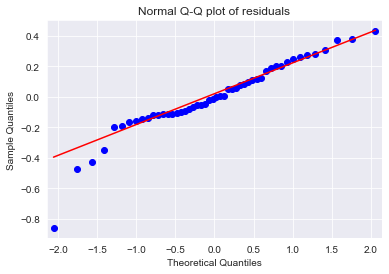

In [88]:
import statsmodels.api as sm
qqplot=sm.qqplot(model_rd.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()  

In [90]:
list(np.where(model_rd.resid<-0.8))

[array([49], dtype=int64)]

In [91]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

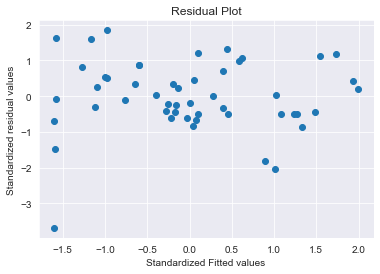

In [92]:
plt.scatter(get_standardized_values(model_rd.fittedvalues),get_standardized_values(model_rd.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

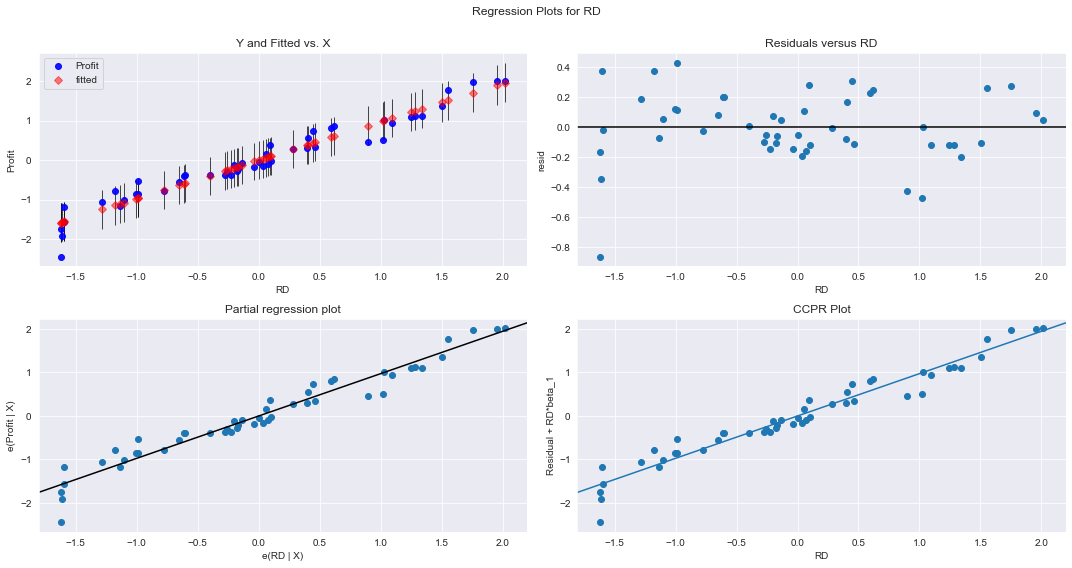

In [93]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_rd, "RD", fig=fig)
plt.show()

In [94]:
model_influence = model_rd.get_influence()
(c, _) = model_influence.cooks_distance

In [95]:
(np.argmax(c),np.max(c))

(49, 0.562061025926428)

In [96]:
df_1=df_1_std.drop(df_1_std.index[[49]],axis=0).reset_index()

In [97]:
df_1.shape

(49, 8)

In [98]:
df_1.head()

,index,RD,Administration,Marketing,Profit,State_California,State_Florida,NewYork
0,0,2.016411,0.560753,2.153943,2.011203,-0.717741,-0.685994,1.393261
1,1,1.955860,1.082807,1.923600,1.999430,1.393261,-0.685994,-0.717741
2,2,1.754364,-0.728257,1.626528,1.980842,-0.717741,1.457738,-0.717741
3,3,1.554784,-0.096365,1.422210,1.776627,-0.717741,-0.685994,1.393261
4,4,1.504937,-1.079919,1.281528,1.357740,-0.717741,1.457738,-0.717741


In [99]:
final_model =smf.ols('Profit~RD',data = df_1).fit()

In [100]:
(final_model.rsquared,final_model.rsquared_adj)

(0.9573395972488337, 0.9564319291051918)

In [103]:
newdata=pd.DataFrame({'RD':100000},index=[1])

In [104]:
final_model.predict(newdata)

1    94277.81544
dtype: float64